<a href="https://colab.research.google.com/github/Muntasir2179/tensorflow-learning/blob/neural-network-regression/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Regression with Neural Networks in TensorFlow

There are difinitions for a regression problem but in our case, we're going to simplify it: predicting a neumerical variable based on some other combination of variables, evem shorter...predicting a number.

In [1]:
# Import TensorFLow
import tensorflow as tf
print(tf.__version__)

2.12.0


## Creating data to view and fit

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

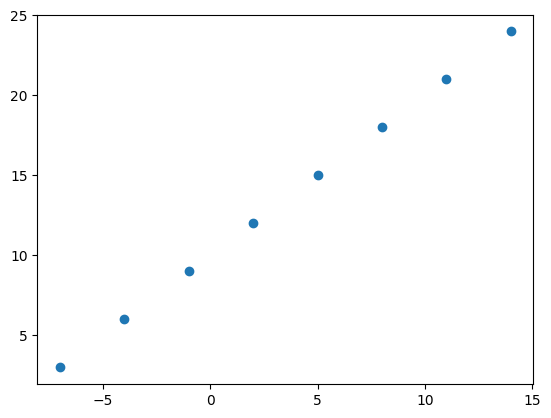

In [3]:
plt.scatter(X, y)

In [4]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [5]:
# let's create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [7]:
X = np.reshape(X, (-1, 1))
X

array([[-7.],
       [-4.],
       [-1.],
       [ 2.],
       [ 5.],
       [ 8.],
       [11.],
       [14.]])

In [8]:
# turn our NumPy array into tensor
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps in modelling with TensorFlow

1. Creting a model - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation matrics (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X & y (features and labels).

In [9]:
tf.random.set_seed(42)

In [10]:
# create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 627ms/step - loss: 9.0166 - mae: 9.0166
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 8.8841 - mae: 8.8841
Epoch 3/5
1/1 [==============================] - 0s 17ms/step - loss: 8.7516 - mae: 8.7516
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 8.6191 - mae: 8.6191
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 8.4866 - mae: 8.4866


## Getting prediction form the model

In [11]:
model.predict([17.0])

1/1 [==============================] - 0s 100ms/step


array([[24.801546]], dtype=float32)

## Improving the model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - Here we might add more layers, increases the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling model** - Here we might change the optimization function or perhaps the learning rate of the optimization function.
3. **Fitting the model** - Here we might fit a model for more epochs (leave ot training for longer) or on more data (give the model more examples to learn from).

### Increasing number of epochs

In [12]:
# lets recreate the model
# Increasing the number of epochs
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 348ms/step - loss: 15.1179 - mae: 15.1179
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 14.8873 - mae: 14.8873
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 14.7548 - mae: 14.7548
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 14.6223 - mae: 14.6223
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 14.4898 - mae: 14.4898
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 14.3573 - mae: 14.3573
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 14.2248 - mae: 14.2248
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 14.0923 - mae: 14.0923
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 13.9598 - mae: 13.9598
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 13.8273 - mae: 13.8273
Epoch 11/100
1/1 [==============================

In [13]:
# remind ourselves of the data
X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [14]:
# let's see if our model's predictino has improved
model.predict([17.0])

1/1 [==============================] - 0s 105ms/step


array([[29.825014]], dtype=float32)

### Adding more hidden units with activation function

In [15]:
# redefining the model but this time we are adding more hidden units
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 680ms/step - loss: 12.1355 - mae: 12.1355
Epoch 2/100
1/1 [==============================] - 0s 25ms/step - loss: 11.6207 - mae: 11.6207
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 11.0975 - mae: 11.0975
Epoch 4/100
1/1 [==============================] - 0s 20ms/step - loss: 10.5629 - mae: 10.5629
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 10.0144 - mae: 10.0144
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 9.4490 - mae: 9.4490
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 8.8638 - mae: 8.8638
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 8.2560 - mae: 8.2560
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 7.6223 - mae: 7.6223
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 7.2691 - mae: 7.2691
Epoch 11/100
1/1 [==============================] - 0s 10ms

In [16]:
# remind ourselves of the data
X, y

(<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [17]:
# getting prediction from the model
model.predict([17.0])

1/1 [==============================] - 0s 291ms/step


array([[29.110493]], dtype=float32)

### Changing the optimizatino funciton

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 13.3587 - mae: 13.3587
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 12.6463 - mae: 12.6463
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 11.9304 - mae: 11.9304
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 11.2079 - mae: 11.2079
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 10.4765 - mae: 10.4765
Epoch 6/100
1/1 [==============================] - 0s 31ms/step - loss: 9.7342 - mae: 9.7342
Epoch 7/100
1/1 [==============================] - 0s 22ms/step - loss: 8.9789 - mae: 8.9789
Epoch 8/100
1/1 [==============================] - 0s 23ms/step - loss: 8.2089 - mae: 8.2089
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 7.4222 - mae: 7.4222
Epoch 10/100
1/1 [==============================] - 0s 20ms/step - loss: 6.7570 - mae: 6.7570
Epoch 11/100
1/1 [==============================] - 0s 16ms/s

In [19]:
model.predict([17.0])

1/1 [==============================] - 0s 128ms/step


array([[27.052212]], dtype=float32)

**🧮🔑Important🔑🧮:** Common ways to improve a deep learning model

*   Adding layers.
*   Increase the number of hidden units.
*   Change the activation function.
*   Change the optimizatino function.
*   Change the learning rate.
*   Fitting on more data.



### Adding more data

It is good idea to visualize:

*  The data - What data are we working with? What does it look like?
*  The model itself - What does our model look like?
*  The training of a model - How does a model performs while it learns?
*  The predictions of the model - How do the prediction of the model line up against the ground truth (the original labels).

In [29]:
# making a bigger dataset
features = tf.range(-100, 100, 4)
labels = features + 10
features, labels

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

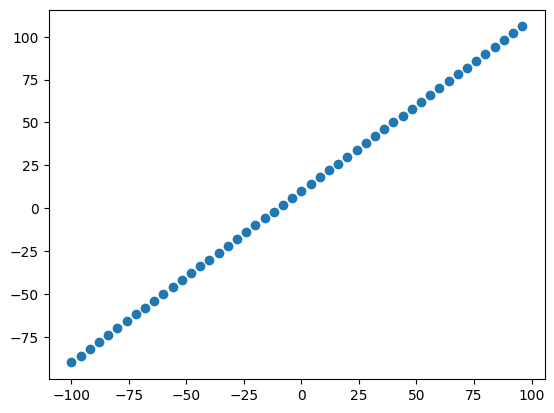

In [30]:
plt.scatter(features, labels)

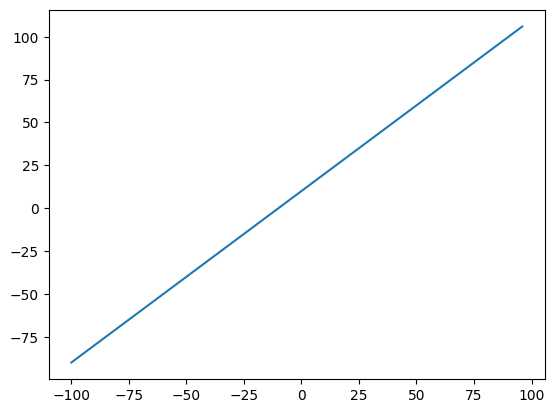

In [31]:
plt.plot(features, labels)

In [32]:
features = tf.reshape(features, shape=(50,1))
features

<tf.Tensor: shape=(50, 1), dtype=int32, numpy=
array([[-100],
       [ -96],
       [ -92],
       [ -88],
       [ -84],
       [ -80],
       [ -76],
       [ -72],
       [ -68],
       [ -64],
       [ -60],
       [ -56],
       [ -52],
       [ -48],
       [ -44],
       [ -40],
       [ -36],
       [ -32],
       [ -28],
       [ -24],
       [ -20],
       [ -16],
       [ -12],
       [  -8],
       [  -4],
       [   0],
       [   4],
       [   8],
       [  12],
       [  16],
       [  20],
       [  24],
       [  28],
       [  32],
       [  36],
       [  40],
       [  44],
       [  48],
       [  52],
       [  56],
       [  60],
       [  64],
       [  68],
       [  72],
       [  76],
       [  80],
       [  84],
       [  88],
       [  92],
       [  96]], dtype=int32)>

In [35]:
# split the data into train and test set
x_train = features[:40, :1]
y_train = labels[:40]

x_test = features[40:, :1]
y_test = labels[40:]

In [39]:
len(x_train), len(x_test), len(y_train), len(y_test)

(40, 10, 40, 10)

## Visualizing the data

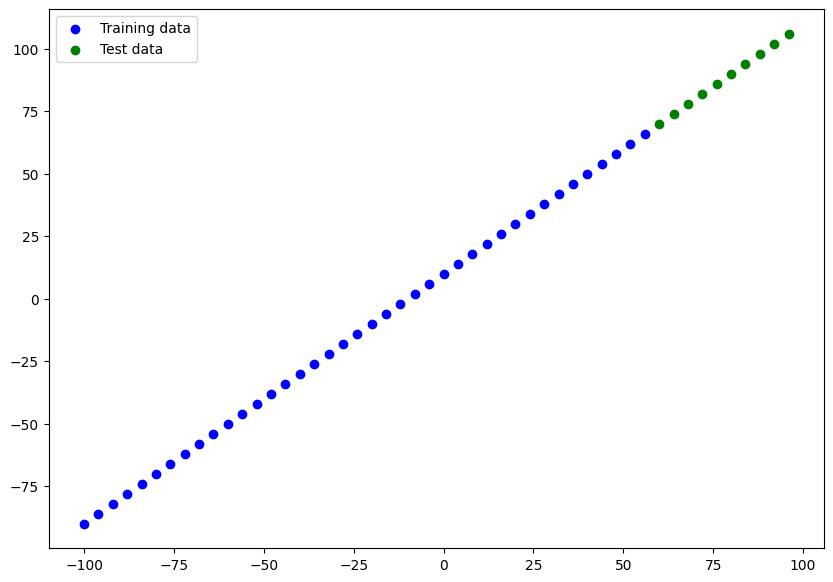

In [40]:
plt.figure(figsize=(10, 7))
# plot training data in blue
plt.scatter(x_train, y_train, c='b', label='Training data')
# plot test data
plt.scatter(x_test, y_test, c='g', label='Test data')
# show the legend
plt.legend()

## Training a neural network

In [44]:
tf.shape(x_train)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([40,  1], dtype=int32)>

In [104]:
# build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape=[1]),
])

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

In [105]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 3)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


🧮🔑**Note:**🔑🧮
*  Total params: Total number of parameters in the model.
*  Trainable parameters: These are the parameters (paterns) the model can update as it trains.
*  Non-trainable params: These parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **Transfer Learning**).


**Complete details about trainable parameters within a layer:**

📖**Resource:** [https://www.youtube.com/watch?v=njKP3FqW3Sk&list=PLHkKmgGGVneX2BzZVYGqcWbFw_7ymcZqv](https://www.youtube.com/watch?v=njKP3FqW3Sk&list=PLHkKmgGGVneX2BzZVYGqcWbFw_7ymcZqv)

In [106]:
# fit the model
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 44.7492 - mae: 44.7492
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 35.6800 - mae: 35.6800
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 27.6219 - mae: 27.6219
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 19.8225 - mae: 19.8225
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 14.1199 - mae: 14.1199
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 10.2377 - mae: 10.2377
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.1496 - mae: 8.1496
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 7.7701 - mae: 7.7701
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 8.8083 - mae: 8.8083
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 8.6347 - mae: 8.6347
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - l